In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils.matrix_builder import create_feature_matrix_with_features

# Load CSV
csv_hour_file = '/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/data/ta_metrics/new_price_metrics_hour_14.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# Decide window size for this run
window_size = 3

# Select features (excluding 'Datetime')
feature_columns = df.columns[1:]
df = df[['Datetime'] + list(feature_columns)]

df['price_t_minus_168'] = df['MarginalES'].shift(7)
df['day_of_week'] = df['Datetime'].dt.dayofweek  # Monday=0
df['month'] = df['Datetime'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# scaler = StandardScaler()
# columns_to_scale = df.columns[window_size+2:]
# print(f"Columns to scale: {columns_to_scale.tolist()}")
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Filter date range
train_start_date = '2018-12-25'
train_end_date = '2019-02-01'
train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

# Create sliding window matrices
X, y = create_feature_matrix_with_features(train_subset_df, window_size)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=10000, max_depth=None, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2: {r2:.4f}")

# Predict next value based on last test row
X_last = X_test.iloc[[-1]]
y_pred_last = rf_model.predict(X_last)[0]
y_actual_last = y_test.iloc[-1]

# Show prediction vs actual
print(f"\nModel: {rf_model.__class__.__name__} with {rf_model.n_estimators} trees")
print(f"\nLast test window input:\n{X_test.iloc[-1]}")
print(f"\nPredicted next price: {y_pred_last:.2f}")
print(f"Actual next price:    {y_actual_last:.2f}")
print(f"Prediction error:     {abs(y_pred_last - y_actual_last):.2f}")

Test MSE: 41.2163
Test MAE: 3.8607
Test R2: -0.0748

Model: RandomForestRegressor with 10000 trees

Last test window input:
price_t-3            54.950000
price_t-2            62.650000
price_t-1            63.650000
SMA_3                60.416667
SMA_5                58.104000
SMA_7                60.184286
SMA_10               62.373000
SMA_30               65.062000
SMA_50               65.005600
SMA_60               65.008000
SMA_100              65.049000
SMA_200              67.013250
EMA_12               61.989659
EMA_26               63.699080
ROC_12               -7.215743
ROC_50               -2.167230
RSI_5                54.798454
RSI_7                52.222300
RSI_14               49.898120
price_t_minus_168    65.040000
day_of_week           2.000000
month                 1.000000
is_weekend            0.000000
Name: 34, dtype: float64

Predicted next price: 66.49
Actual next price:    60.10
Prediction error:     6.39


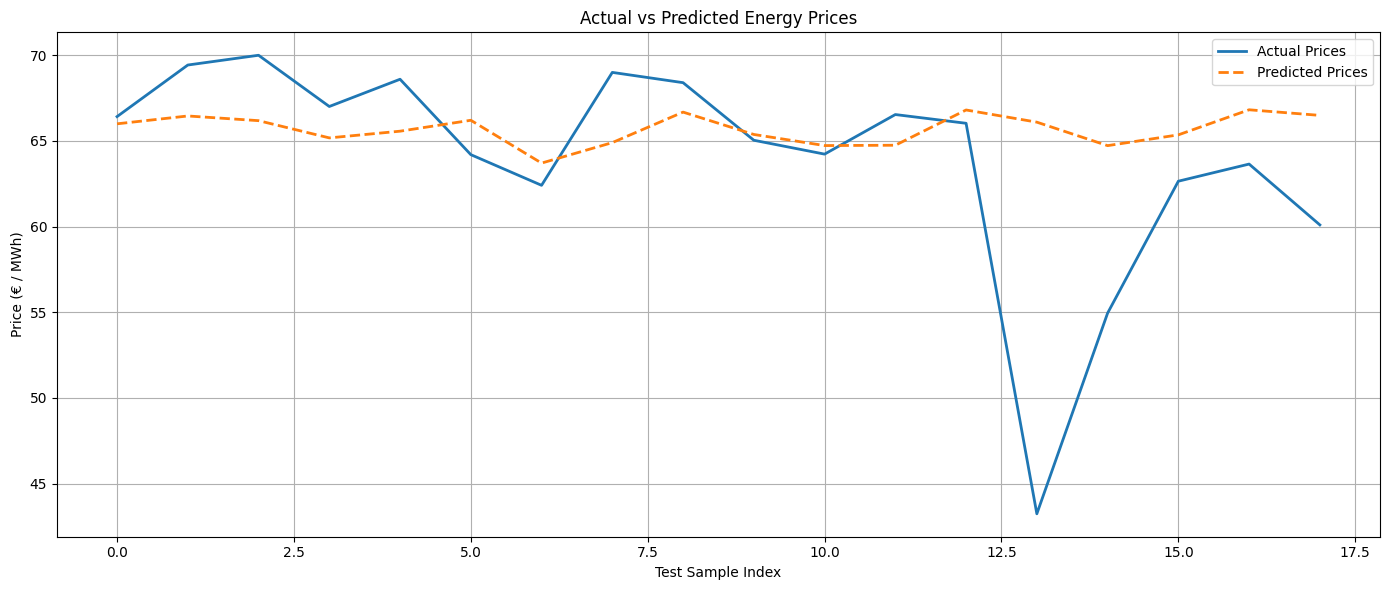

In [8]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Prices', linewidth=2)
plt.plot(y_test_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Energy Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Price (€ / MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

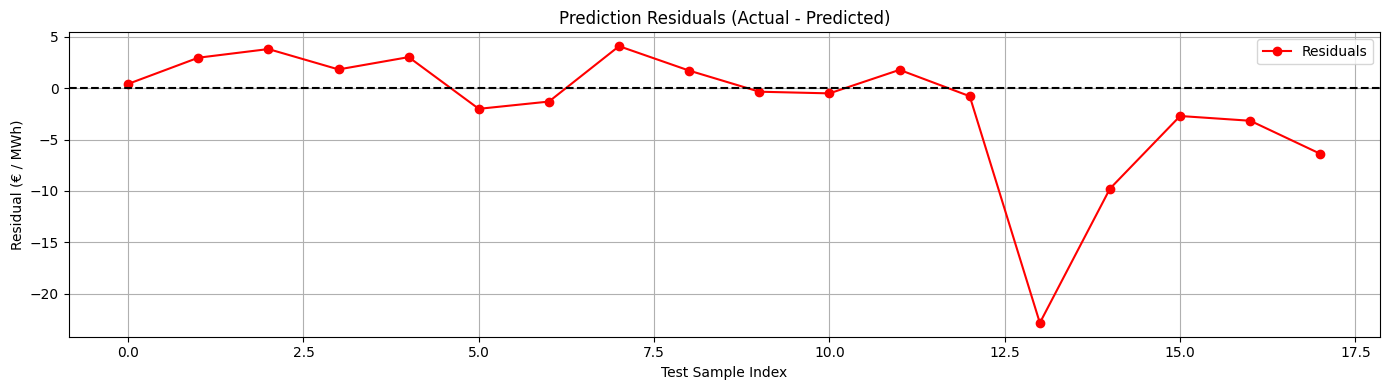

In [9]:
# Plot prediction errors (residuals)
plt.figure(figsize=(14, 4))
residuals = y_test.values - y_test_pred
plt.plot(residuals, color='red', marker='o', linestyle='-', label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Residuals (Actual - Predicted)")
plt.xlabel("Test Sample Index")
plt.ylabel("Residual (€ / MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

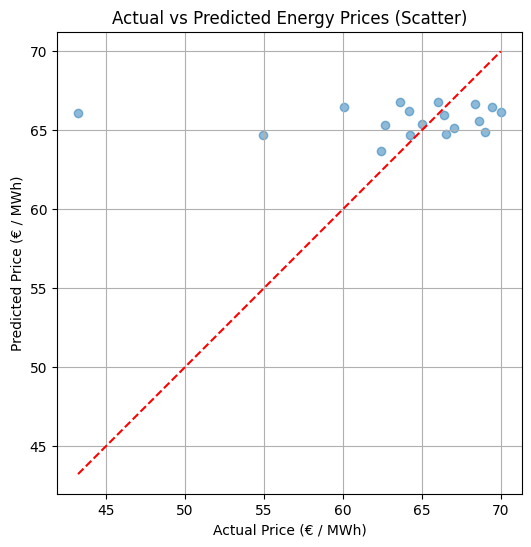

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (€ / MWh)")
plt.ylabel("Predicted Price (€ / MWh)")
plt.title("Actual vs Predicted Energy Prices (Scatter)")
plt.grid(True)
plt.axis('equal')
plt.show()

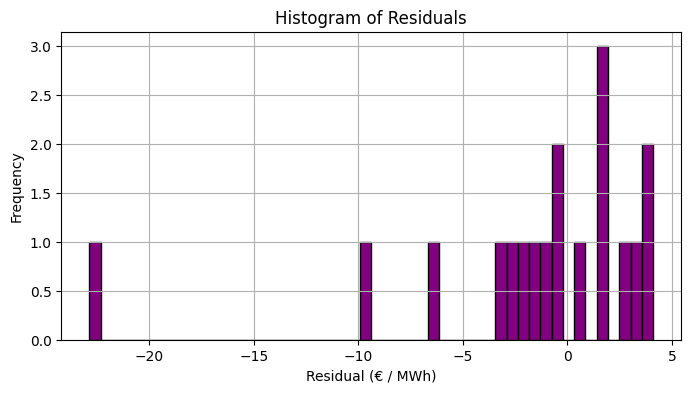

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(y_test - y_test_pred, bins=50, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residual (€ / MWh)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [12]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.tight_layout()
plt.show()

NameError: name 'model' is not defined